 # Лабораторная работа №2 
 ## Вариант 19

$
y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
![](./find-a-b.png)

In [1]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from math import floor

max_n = 1000
a = -2
b = 4
COUNT_INTEVAL = 20

## Теоретическая плотность распределения
![](./analytical.jpg)

*Опечатка, F(y)*

![](./analytical1.jpg)

In [2]:
def func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

borderA = func(a)
borderB = func(b)

def analytical_func_densiny(y):    
    if y >= borderA and y <= borderB:
        return (1 / 2) * (y ** 2)
    return 0

def add_analytical_func_to_plot():
    x_axis = np.linspace(func(a), func(b), 1000)
    y_axis = [analytical_func_densiny(i) for i in x_axis]
    plt.step(x_axis, y_axis, label="analytical function densiny")
    plt.legend()

## Построение вариационного ряда

In [3]:
def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Функции для построения полигонов

In [4]:
def serialize_polygon_values(values):
    x_axis = []
    y_axis = []
    for i in values:
        x_axis.append((i[0] + i[1]) / 2)
        y_axis.append(i[2] * abs(i[0] - i[1]))
    return x_axis, y_axis

def add_polygon_to_plot(values, label):
    x_axis, y_axis = serialize_polygon_values(values)
    plt.plot(x_axis, y_axis, label=label)
    plt.scatter(x_axis, y_axis)
    plt.legend()

def add_empiric_to_plot(values, label):
    x_axis, yy = serialize_polygon_values(values)
    sum = 0
    eps = 0.0001
    y_axis = [0, 0]
    x_axis = [a, x_axis[0] - eps] + x_axis
    for x in yy:
        sum += x
        y_axis.append(sum)
    plt.step(x_axis, y_axis, label=label)
    plt.legend()

## Равноинтервальный метод 

In [5]:
def equal_range_method(y_sample):
    MIN = y_sample[0]
    MAX = y_sample[len(y_sample) - 1]
    count = len(y_sample)
    interval = (MAX - MIN) / COUNT_INTEVAL
    current = MIN
    result = []
    while current < MAX:
        left = current
        right = current + interval
        in_current_interval = 0
        for i in y_sample:
            if left <= i and i <= right:
                in_current_interval += 1

        result.append((left, right, in_current_interval / (count * interval)))

        current += interval
    return result

## Построение гистограммы равноинтервальным методом

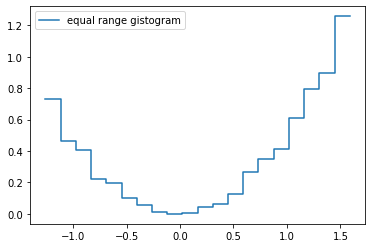

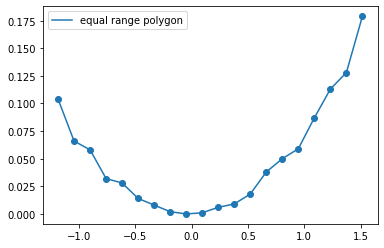

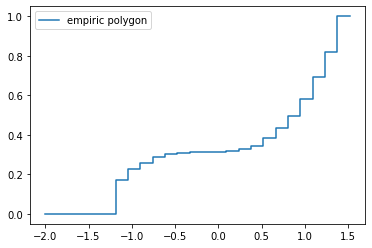

In [6]:
def add_equal_range_method_to_plot(values):
    y_axis = []
    x_axis = []
    for i in values:
        y_axis.append(i[0])
        y_axis.append(i[1])
        x_axis.append(i[2])
        x_axis.append(i[2])
    plt.step(y_axis, x_axis, label="equal range gistogram")
    plt.legend()

equal_range_values = equal_range_method(y_sample)
add_equal_range_method_to_plot(equal_range_values)
plt.show()
add_polygon_to_plot(equal_range_values, "equal range polygon")
plt.show()
add_empiric_to_plot(equal_range_values, "empiric polygon")
plt.show()



## Равновероятностный метод

In [7]:
def equal_chance_method(y_sample):
    count = len(y_sample)
    take_points = count / COUNT_INTEVAL
    interval_count = count / COUNT_INTEVAL
    representative_eps = 6
    current = 0
    result = []

    while True:
        left = current
        right = round(take_points)

        if right >= len(y_sample):
            right = len(y_sample) - 1

        if abs(right - left + 1 - interval_count) <= representative_eps:
            result.append((y_sample[left], y_sample[right], (right - left + 1) / (count * (y_sample[right] - y_sample[left]))))

        if right == count - 1:
            break

        current = right + 1
        
        take_points += interval_count

    return result


## Построение гистограммы равновероятностным методом

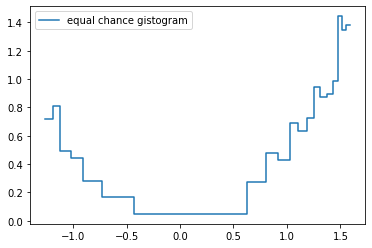

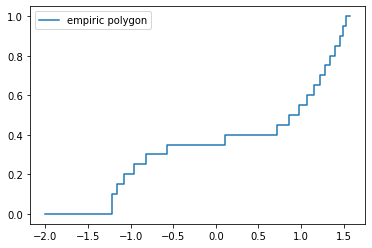

In [8]:
def add_equal_chance_method_to_plot(values):
    y_axis = []
    x_axis = []
    for i in values:
        y_axis.append(i[0])
        y_axis.append(i[1])
        x_axis.append(i[2])
        x_axis.append(i[2])
    plt.step(y_axis, x_axis, label="equal chance gistogram")
    plt.legend()

equal_chance_values = equal_chance_method(y_sample)
add_equal_chance_method_to_plot(equal_chance_values)
plt.show()
add_empiric_to_plot(equal_chance_values, "empiric polygon")
plt.show()


## Сравнение

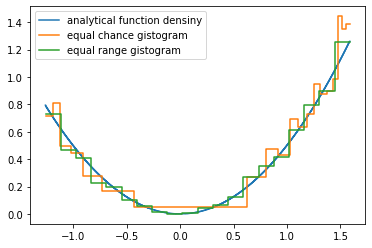

In [9]:
add_analytical_func_to_plot()
equal_chance_values = equal_chance_method(y_sample)
add_equal_chance_method_to_plot(equal_chance_values)
equal_range_values = equal_range_method(y_sample)
add_equal_range_method_to_plot(equal_range_values)
plt.show()